根据词频，开始生成词云!


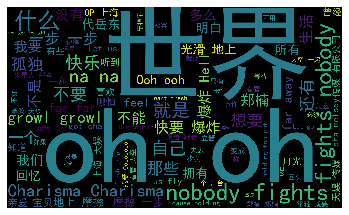

In [70]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }
 
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['华晨','作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="simhei.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    #print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       #print(href, '  ', name)
    return song_ids, song_names
# 设置歌手ID，华晨宇为861777
artist_id = '861777'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    #print(song_name)
#根据词频 生成词云
create_word_cloud(all_word)

In [ ]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌单ID，生成该歌的词云
#需要注意的有两点
#1.歌单返回的是json文件，get_songs需要参考get_songs_lyri获取
#2.list_url中间是str类型，注意类型转换
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }

# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())
    
    
    
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f


# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="simhei.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    #print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
def get_songs(playlist_id):
    page_url='http://music.163.com/api/playlist/detail?id='+playlist_id
    #获取网页HTML
    res=requests.request('GET',page_url,headers=headers)
    # 输出歌单中歌曲数量
    #print(len(res.json()['result']['tracks']))

    # 设置热门歌曲的ID，歌曲名称
    song_ids=[]
    song_names=[]

    for i in range(len(res.json()['result']['tracks'])):
        names=res.json()['result']['tracks'][i]['name']
        ids=res.json()['result']['tracks'][i]['id']
        song_names.append(names)
        song_ids.append(ids)
        #print(names,' ',ids)
    return song_ids,song_names


# 设置歌单ID
id = '606070867'
[song_ids, song_names] = get_songs(id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + str(song_id) + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    #print(song_name)



#根据词频 生成词云
create_word_cloud(all_word)